#  Mushroom Image Classifier

This notebook builds an image classifier for the 20 most observed mushroom species in Italy region in the INaturalist website, each species with ~1000 images, classifier is trained using transfer learning using imagenet weights with MobileNetV2 as a base model. It uses an 70/20/10 train/validation/test split.

## DATASET : https://drive.google.com/file/d/1ZuKf5-fXRvdbYMGIvJOeHB3Yr2gl3kx5/view?usp=drive_link

# DATA SPLITTING

In [ ]:
import os
from PIL import Image
from sklearn.model_selection import train_test_split

# Paths
input_dir = '../inaturalist_images'
output_dir = '../inaturalist_split'
train_dir = os.path.join(output_dir, 'train')
val_dir = os.path.join(output_dir, 'val')
test_dir = os.path.join(output_dir, 'test')

# Resize dimensions
TARGET_SIZE = (256, 256)

# Ensure output folders exist
os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# Split ratios
train_ratio = 0.7
val_ratio = 0.2
test_ratio = 0.1

def copy_and_resize(src_path, dst_path):
    try:
        with Image.open(src_path) as img:
            img = img.convert("RGB")
            img = img.resize(TARGET_SIZE, Image.Resampling.LANCZOS)
            img.save(dst_path, format="JPEG", quality=90)
    except Exception as e:
        print(f"Error processing {src_path}: {e}")

# Process each class
for class_name in os.listdir(input_dir):
    class_path = os.path.join(input_dir, class_name)
    if not os.path.isdir(class_path):
        continue

    print(f"Processing class: {class_name}")
    
    # Prepare class output dirs
    train_class_dir = os.path.join(train_dir, class_name)
    val_class_dir = os.path.join(val_dir, class_name)
    test_class_dir = os.path.join(test_dir, class_name)
    os.makedirs(train_class_dir, exist_ok=True)
    os.makedirs(val_class_dir, exist_ok=True)
    os.makedirs(test_class_dir, exist_ok=True)

    # Get all images
    img_list = [f for f in os.listdir(class_path) 
                if not f.startswith('.') and os.path.isfile(os.path.join(class_path, f))]

    print(f"  Total files: {len(img_list)}")

    # First split: train vs temp (val + test)
    train_imgs, temp_imgs = train_test_split(img_list, test_size=(1 - train_ratio), random_state=42)

    # Second split: val vs test
    val_split = val_ratio / (val_ratio + test_ratio)
    val_imgs, test_imgs = train_test_split(temp_imgs, test_size=(1 - val_split), random_state=42)

    print(f"  Train: {len(train_imgs)}, Val: {len(val_imgs)}, Test: {len(test_imgs)}")

    # Copy and resize
    for img_name in train_imgs:
        copy_and_resize(os.path.join(class_path, img_name), os.path.join(train_class_dir, img_name))
    for img_name in val_imgs:
        copy_and_resize(os.path.join(class_path, img_name), os.path.join(val_class_dir, img_name))
    for img_name in test_imgs:
        copy_and_resize(os.path.join(class_path, img_name), os.path.join(test_class_dir, img_name))

print("Data split and resizing (256x256) complete.")

Processing class: Amanita_citrina
  Total files: 885
  Train: 619, Val: 177, Test: 89
Processing class: Amanita_muscaria
  Total files: 1000
  Train: 699, Val: 200, Test: 101
Processing class: Amanita_pantherina
  Total files: 999
  Train: 699, Val: 199, Test: 101
Processing class: Amanita_phalloides
  Total files: 808
  Train: 565, Val: 161, Test: 82
Processing class: Amanita_rubescens
  Total files: 1000
  Train: 699, Val: 200, Test: 101
Processing class: Armillaria_mellea
  Total files: 1000
  Train: 699, Val: 200, Test: 101
Processing class: Auricularia_auricula-judae
  Total files: 1000
  Train: 699, Val: 200, Test: 101
Processing class: Auricularia_mesenterica
  Total files: 1000
  Train: 699, Val: 200, Test: 101
Processing class: Boletus_edulis
  Total files: 1000
  Train: 699, Val: 200, Test: 101
Processing class: Clathrus_ruber
  Total files: 1000
  Train: 699, Val: 200, Test: 101
Processing class: Coprinus_comatus
  Total files: 1000
  Train: 699, Val: 200, Test: 101
Processi

# MOBILENET MODEL TRAINING


Loading data for MobileNetV2...
Found 13297 images belonging to 20 classes.
Found 3800 images belonging to 20 classes.
Found 1924 images belonging to 20 classes.


C:\Users\sinan\AppData\Local\Temp\ipykernel_5208\1375854370.py:16: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=input_shape)


Training model...
Epoch 1/20
416/416 ━━━━━━━━━━━━━━━━━━━━ 427s 1s/step - accuracy: 0.3223 - loss: 2.7754 - val_accuracy: 0.6003 - val_loss: 1.4255
Epoch 2/20
416/416 ━━━━━━━━━━━━━━━━━━━━ 501s 1s/step - accuracy: 0.6293 - loss: 1.3153 - val_accuracy: 0.6537 - val_loss: 1.3213
Epoch 3/20
416/416 ━━━━━━━━━━━━━━━━━━━━ 435s 1s/step - accuracy: 0.6941 - loss: 1.0394 - val_accuracy: 0.7042 - val_loss: 1.1097
Epoch 4/20
416/416 ━━━━━━━━━━━━━━━━━━━━ 312s 750ms/step - accuracy: 0.7427 - loss: 0.8470 - val_accuracy: 0.7345 - val_loss: 1.0118
Epoch 5/20
416/416 ━━━━━━━━━━━━━━━━━━━━ 343s 824ms/step - accuracy: 0.7691 - loss: 0.7537 - val_accuracy: 0.7458 - val_loss: 0.9559
Epoch 6/20
416/416 ━━━━━━━━━━━━━━━━━━━━ 334s 802ms/step - accuracy: 0.7979 - loss: 0.6602 - val_accuracy: 0.7397 - val_loss: 1.0271
Epoch 7/20
416/416 ━━━━━━━━━━━━━━━━━━━━ 283s 681ms/step - accuracy: 0.8066 - loss: 0.6219 - val_accuracy: 0.7597 - val_loss: 0.9166
Epoch 8/20
416/416 ━━━━━━━━━━━━━━━━━━━━ 381s 917ms/step - accuracy:

Test accuracy: 0.7853, Test loss: 0.8217
Saving model to mushroom_mobilenet_frozen.h5...


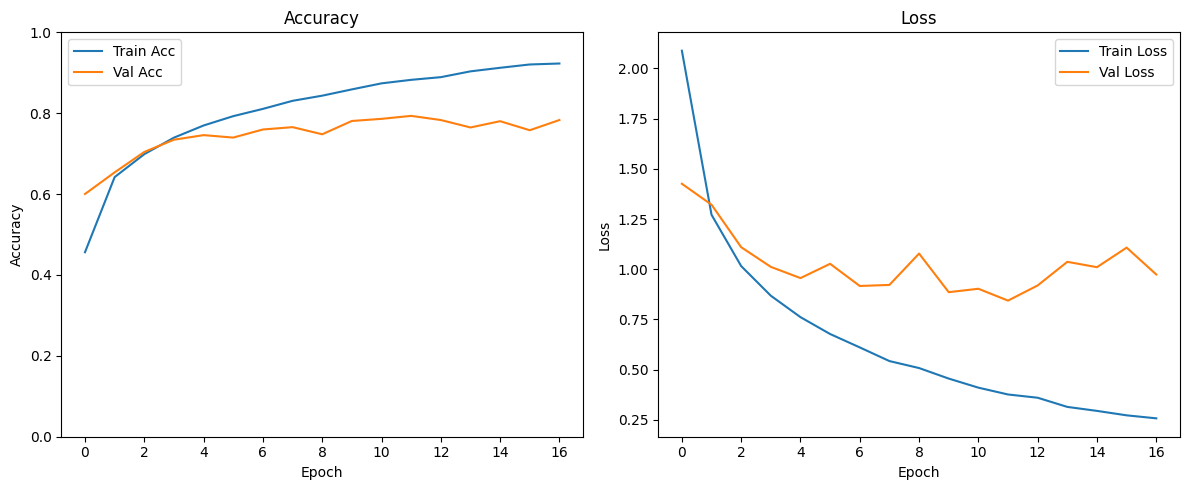

Unfreezing base model for fine-tuning...
Training model...
Epoch 1/10
416/416 ━━━━━━━━━━━━━━━━━━━━ 1141s 3s/step - accuracy: 0.7828 - loss: 0.7571 - val_accuracy: 0.7863 - val_loss: 0.8641
Epoch 2/10
416/416 ━━━━━━━━━━━━━━━━━━━━ 1361s 3s/step - accuracy: 0.8409 - loss: 0.5346 - val_accuracy: 0.7763 - val_loss: 0.8666
Epoch 3/10
416/416 ━━━━━━━━━━━━━━━━━━━━ 1328s 3s/step - accuracy: 0.8547 - loss: 0.4706 - val_accuracy: 0.7792 - val_loss: 0.8464
Epoch 4/10
416/416 ━━━━━━━━━━━━━━━━━━━━ 1256s 3s/step - accuracy: 0.8737 - loss: 0.4056 - val_accuracy: 0.7816 - val_loss: 0.8212
Epoch 5/10
416/416 ━━━━━━━━━━━━━━━━━━━━ 1192s 3s/step - accuracy: 0.8804 - loss: 0.3873 - val_accuracy: 0.7871 - val_loss: 0.7962
Epoch 6/10
416/416 ━━━━━━━━━━━━━━━━━━━━ 782s 2s/step - accuracy: 0.8942 - loss: 0.3539 - val_accuracy: 0.7942 - val_loss: 0.7678
Epoch 7/10
416/416 ━━━━━━━━━━━━━━━━━━━━ 778s 2s/step - accuracy: 0.8880 - loss: 0.3598 - val_accuracy: 0.8055 - val_loss: 0.7568
Epoch 8/10
416/416 ━━━━━━━━━━━━━━

Test accuracy: 0.8108, Test loss: 0.6871
Saving model to mushroom_mobilenet_finetuned.h5...


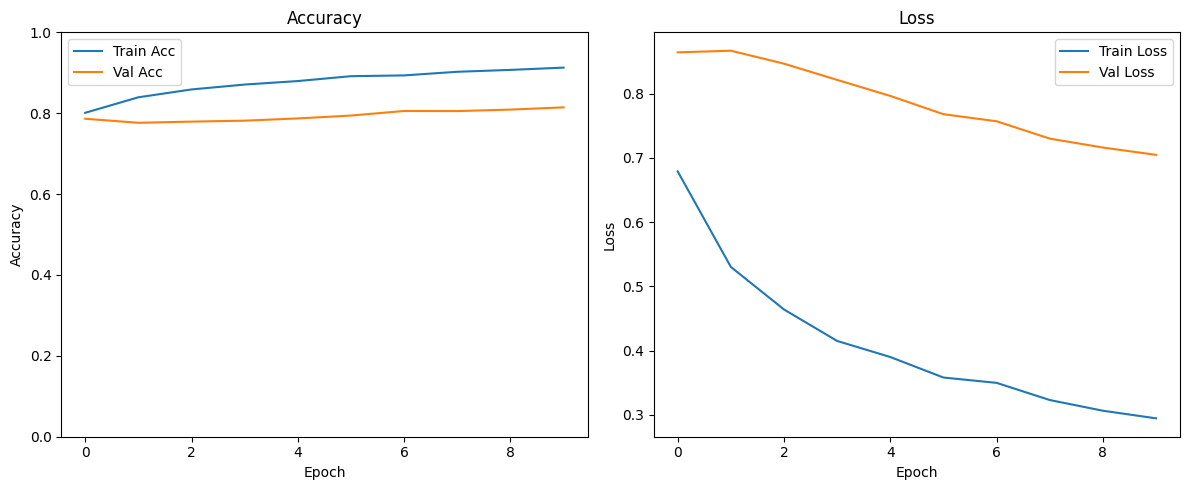

In [ ]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import (
    BatchNormalization, GlobalAveragePooling2D, Dense, Dropout
)
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np


#our model using mobilenetv2 as a base and freezing
def mobilenet_model(input_shape, num_classes):

    base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=input_shape)
    
    # freezing top layers initally
    for i, layer in enumerate(base_model.layers):
        layer.trainable = False if i < 135  else True
    
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = BatchNormalization()(x)
    x = Dropout(0.5)(x)  
    
    predictions = Dense(num_classes, activation='softmax', kernel_regularizer=l2(0.001))(x)
    
    model = Model(inputs=base_model.input, outputs=predictions)
    
    # Lower learning rate
    model.compile(optimizer=Adam(learning_rate=0.0001), 
                 loss='categorical_crossentropy', 
                 metrics=['accuracy'])
    
    return model

#training function with early stopping
def train_model(model, train_gen, val_gen, epochs=30):
    print('Training model...')
    early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=1)
    
    history = model.fit(
        train_gen,
        epochs=epochs,
        validation_data=val_gen,
        callbacks=[early_stop]
    )
    return history

def evaluate_model(model, history, test_gen, model_name):
    print('Evaluating on test set...')
    test_loss, test_acc = model.evaluate(test_gen, verbose=0)
    print(f"Test accuracy: {test_acc:.4f}, Test loss: {test_loss:.4f}")
    
    print(f'Saving model to {model_name}...')
    model.save(model_name)

    # Plot
    plt.figure(figsize=(12, 5))

    # Accuracy plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Acc')
    plt.plot(history.history['val_accuracy'], label='Val Acc')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.ylim(0, 1)  # Limit y-axis to 0-1 for accuracy
    plt.legend()
    plt.title('Accuracy')

    # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    # No ylim here to let it autoscale
    plt.legend()
    plt.title('Loss')

    plt.tight_layout()
    plt.show()



def main():
    # --- DIRECTORIES ---
    base_dir = '../inaturalist_split'
    train_dir = f'{base_dir}/train'
    test_dir = f'{base_dir}/test'
    val_dir = f'{base_dir}/val'

    # --- PARAMETERS ---
    img_size = (224, 224)
    batch_size = 32
    epochs = 20

    print('Loading data for MobileNetV2...')

    # Add mild augmentation during training for better generalization
    train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=20,
        width_shift_range=0.1,
        height_shift_range=0.1,
        horizontal_flip=True,
        fill_mode='nearest'
    )

    train_gen = train_datagen.flow_from_directory(
        train_dir,
        target_size=img_size,
        batch_size=batch_size,
        class_mode='categorical'
    )

    # No augmentation for validation
    val_datagen = ImageDataGenerator(rescale=1./255) 
    val_gen = val_datagen.flow_from_directory(
        val_dir,
        target_size=img_size,
        batch_size=batch_size,
        class_mode='categorical'
    )


    # Separate test generator
    test_datagen = ImageDataGenerator(rescale=1./255)
    test_gen = test_datagen.flow_from_directory(
        test_dir,
        target_size=img_size,
        batch_size=batch_size,
        class_mode='categorical'
    )


    num_classes = train_gen.num_classes

    # Train with frozen base
    model = mobilenet_model(img_size + (3,), num_classes)
    history = train_model(model, train_gen, val_gen, epochs=epochs)
    evaluate_model(model, history, test_gen, model_name='mushroom_mobilenet_frozen.h5')

    # Fine-tune
    print('Unfreezing base model for fine-tuning...')
    for layer in model.layers:
        layer.trainable = True
    model.compile(optimizer=Adam(1e-5), loss='categorical_crossentropy', metrics=['accuracy'])
    history_finetuned = train_model(model, train_gen, val_gen, epochs=10)
    evaluate_model(model, history_finetuned, test_gen, model_name='mushroom_mobilenet_finetuned.h5')

if __name__ == '__main__':
    main()


In [ ]:
import visualkeras

def mobilenet_model1(image_size, num_classes, freeze_until=100):
    # Reset session
    base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=image_size)
    for i, layer in enumerate(base_model.layers):
        layer.trainable = False if i < freeze_until else True

    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dropout(0.25)(x)
    x = Dense(512, activation='relu')(x)
    x = Dropout(0.5)(x)
    output = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs=base_model.input, outputs=output)
    model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['acc'])
    return model

mobilenet_model = mobilenet_model1((128, 128, 3), 10, freeze_until=100)
mobilenet_model.summary()
visualkeras.layered_view(mobilenet_model, legend = True, spacing = 10)


# MODEL PREDICTIONS

Loading model...


Found 1924 images belonging to 20 classes.


c:\Users\sinan\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Generating predictions...
61/61 ━━━━━━━━━━━━━━━━━━━━ 21s 328ms/step


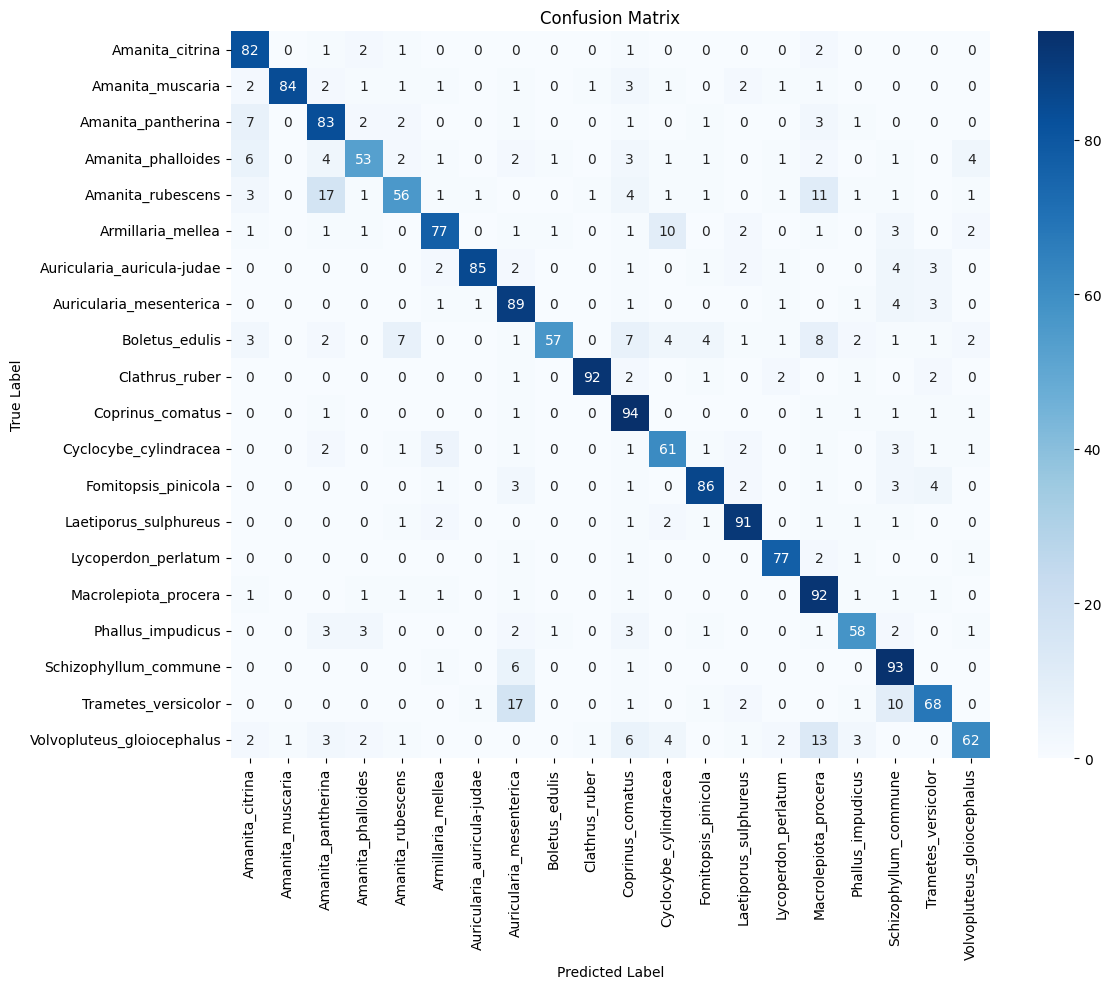

Classification Report:
                            precision    recall  f1-score   support

           Amanita_citrina       0.77      0.92      0.84        89
          Amanita_muscaria       0.99      0.83      0.90       101
        Amanita_pantherina       0.70      0.82      0.75       101
        Amanita_phalloides       0.80      0.65      0.72        82
         Amanita_rubescens       0.77      0.55      0.64       101
         Armillaria_mellea       0.83      0.76      0.79       101
Auricularia_auricula-judae       0.97      0.84      0.90       101
   Auricularia_mesenterica       0.68      0.88      0.77       101
            Boletus_edulis       0.95      0.56      0.71       101
            Clathrus_ruber       0.97      0.91      0.94       101
          Coprinus_comatus       0.70      0.93      0.80       101
     Cyclocybe_cylindracea       0.73      0.76      0.74        80
       Fomitopsis_pinicola       0.87      0.85      0.86       101
     Laetiporus_sulphure

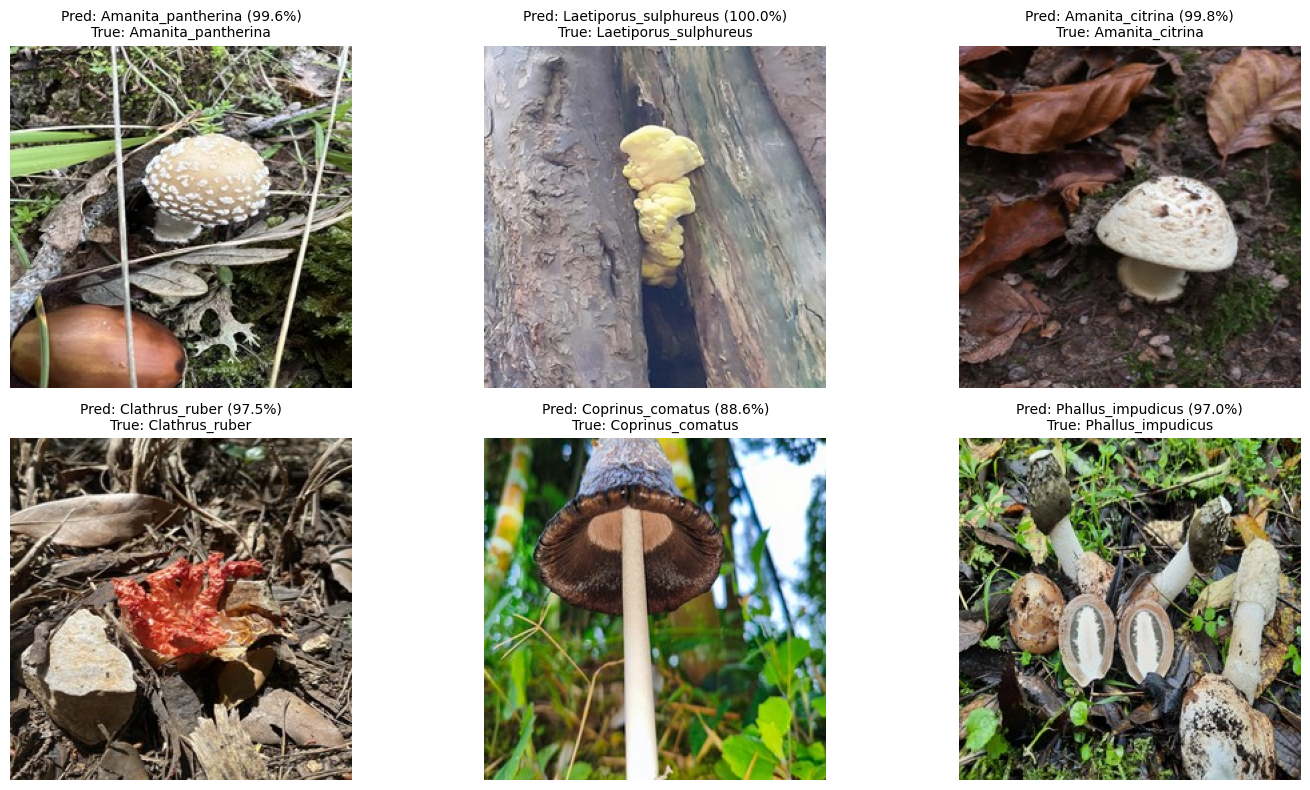

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from sklearn.metrics import classification_report, confusion_matrix

# --- SETTINGS ---
model_path = 'models/mushroom_mobilenet_finetuned.h5'
test_dir = '../inaturalist_split/test'
img_size = (256, 256)
batch_size = 32

# --- LOAD MODEL ---
print("Loading model...")
model = load_model(model_path)

# --- PREPARE TEST DATA ---
test_datagen = ImageDataGenerator(rescale=1./255)
test_gen = test_datagen.flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False  # Important for matching order
)

# --- PREDICTIONS ---
print("Generating predictions...")
pred_probs = model.predict(test_gen, verbose=1)
y_pred = np.argmax(pred_probs, axis=1)
y_true = test_gen.classes
class_labels = list(test_gen.class_indices.keys())

# --- CONFUSION MATRIX ---
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(12, 10))
sns.heatmap(cm, xticklabels=class_labels, yticklabels=class_labels, 
            annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()

# --- CLASSIFICATION REPORT ---
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=class_labels))

# --- RANDOM TEST IMAGES WITH PREDICTIONS + CONFIDENCE ---
print("Displaying 6 random predictions...")
indices = random.sample(range(len(test_gen.filenames)), 6)
plt.figure(figsize=(15, 8))

for i, idx in enumerate(indices):
    img_path = test_gen.filepaths[idx]
    img = load_img(img_path, target_size=img_size)
    img_array = img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    pred = model.predict(img_array)[0]
    pred_label_idx = np.argmax(pred)
    pred_confidence = pred[pred_label_idx]
    
    pred_label = class_labels[pred_label_idx]
    true_label = class_labels[y_true[idx]]
    
    plt.subplot(2, 3, i+1)
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Pred: {pred_label} ({pred_confidence*100:.1f}%)\nTrue: {true_label}", fontsize=10)

plt.tight_layout()
plt.show()

